In [427]:
# Import the necessary libraries.

from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import preprocessing
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sn


In [428]:
# Decide which parameters to use.
data = pd.DataFrame(pd.read_csv("energy.csv", header = 0))
data = data.drop(['buildingname', 'buildingaddress', 'buildingtype', 
                'greenmarkyearofaward', 'greenmarkversion', 'centralisedairconditioningplantefficiency',
                'numberofhotelrooms', 'yearoflastchillerplantaudithealthcheck', 'buildingsize',
                 'yearobtainedtopcsc', 'greenmarkrating'], axis = 1)

# Replacing of Multinary Data.
data = data.replace(['Small', 'Hotel', np.nan, 'N', 'Air Cooled Chilled Water Plant'], 0)
data = data.replace(['Certified', 'Gold', 'Platinum','GoldPlus', 'Legislated', 'Large', 'Y', 'Mixed Development', 'District Cooling Plant'], 1)
data = data.replace(['Others','Office'], 2)
data = data.replace(['Retail', 'Water Cooled Chilled Water Plant'], 3)
data = data.replace('Water Cooled Packaged Unit', 4)
data = data.replace('Omit', 5)
data['grossfloorarea'] = data['grossfloorarea'].str.replace(',', '').astype(float)


# Convert the percentages to floats.
data['percentageofairconditionedfloorarea'] = data['percentageofairconditionedfloorarea'].str.rstrip('%').astype('float') / 100.0
data['averagemonthlybuildingoccupancyrate'] = data['averagemonthlybuildingoccupancyrate'].str.rstrip('%').astype('float') / 100.0
data['percentageusageofled'] = data['percentageusageofled'].str.rstrip('%').astype('float') / 100.0

data = data.drop(['averagemonthlybuildingoccupancyrate', 'percentageusageofled', 'ageofchiller'], axis = 1)

# Replace 0s in the 2019 column.
data['2019'] = data['2019'].replace(0, np.nan).fillna(data['2020'])
data['2018'] = data['2018'].replace(0, np.nan).fillna((data['2020'] + data['2019'])/2)
data['2017'] = data['2017'].replace(0, np.nan).fillna((data['2018'] + data['2020'] + data['2019'])/3)

# Transforming percentages.
data['percentageofairconditionedfloorarea'] = data['grossfloorarea'] * data['percentageofairconditionedfloorarea']



display(data)

corr = data.corr()
corr.style.background_gradient(cmap='coolwarm')

,mainbuildingfunction,grossfloorarea,percentageofairconditionedfloorarea,typeofairconditioningsystem,installationofsolarpv,2017,2018,2019,2020
0,1,65947.0,61330.71,3,0,281.32,276.83,274.91,250.89
1,2,7372.0,7150.84,2,0,277.93,268.76,264.79,216.27
2,2,5030.0,4024.00,2,0,171.16,165.32,165.52,115.42
3,2,5824.0,4076.80,2,0,185.64,168.50,163.46,138.01
4,2,10418.0,10418.00,3,0,158.37,140.95,149.12,129.54
...,...,...,...,...,...,...,...,...,...
559,1,48324.0,48324.00,3,0,370.82,369.80,369.88,302.62
560,1,80858.0,75197.94,3,1,286.84,286.84,208.43,365.25
561,3,18841.0,13377.11,3,0,233.81,221.81,216.03,144.90
562,2,64562.0,52940.84,3,0,66.01,92.36,125.91,121.20


,mainbuildingfunction,grossfloorarea,percentageofairconditionedfloorarea,typeofairconditioningsystem,installationofsolarpv,2017,2018,2019,2020
mainbuildingfunction,1.000000,0.054194,0.020155,-0.039116,0.084693,0.121187,0.100105,0.095165,0.093132
grossfloorarea,0.054194,1.000000,0.894068,-0.019123,0.198253,-0.011248,-0.014275,-0.027257,-0.036203
percentageofairconditionedfloorarea,0.020155,0.894068,1.000000,0.000940,0.216665,0.023346,0.020487,0.021040,0.007870
typeofairconditioningsystem,-0.039116,-0.019123,0.000940,1.000000,0.002539,0.013279,0.012994,0.030814,0.016900
installationofsolarpv,0.084693,0.198253,0.216665,0.002539,1.000000,-0.024779,-0.027859,-0.021246,-0.012681
2017,0.121187,-0.011248,0.023346,0.013279,-0.024779,1.000000,0.984154,0.959862,0.902237
2018,0.100105,-0.014275,0.020487,0.012994,-0.027859,0.984154,1.000000,0.971771,0.914844
2019,0.095165,-0.027257,0.021040,0.030814,-0.021246,0.959862,0.971771,1.000000,0.947997
2020,0.093132,-0.036203,0.007870,0.016900,-0.012681,0.902237,0.914844,0.947997,1.000000


In [429]:
# Average of the 2017-2019 model:

data['energy2020'] = data['2020'] * data['grossfloorarea']
data['energy2019'] = data['2019'] * data['grossfloorarea']
data['energy2018'] = data['2018'] * data['grossfloorarea']
data['energy2017'] = data['2017'] * data['grossfloorarea']

data = data.drop(['2020', '2019', '2018', '2017'], axis = 1)
data['average_energy'] = (data['energy2017'] + data['energy2018'] + data['energy2019'])/3
data = data.drop(['energy2019', 'energy2018', 'energy2017', 'grossfloorarea'], axis = 1)


corr = data.corr()
corr.style.background_gradient(cmap='coolwarm')

,mainbuildingfunction,percentageofairconditionedfloorarea,typeofairconditioningsystem,installationofsolarpv,energy2020,average_energy
mainbuildingfunction,1.000000,0.020155,-0.039116,0.084693,0.084195,0.081805
percentageofairconditionedfloorarea,0.020155,1.000000,0.000940,0.216665,0.840521,0.837304
typeofairconditioningsystem,-0.039116,0.000940,1.000000,0.002539,-0.012894,-0.037274
installationofsolarpv,0.084693,0.216665,0.002539,1.000000,0.192196,0.175058
energy2020,0.084195,0.840521,-0.012894,0.192196,1.000000,0.974412
average_energy,0.081805,0.837304,-0.037274,0.175058,0.974412,1.000000


In [430]:
# Create interaction variables:

data['int_benergy'] = data['mainbuildingfunction'] * data['average_energy']
data['int_solar_energy'] = data['installationofsolarpv'] * data['average_energy']
data['int_con_energy'] = data['typeofairconditioningsystem'] * data['average_energy']

data['int_conditioners'] = data['typeofairconditioningsystem'] * data['percentageofairconditionedfloorarea']
data['int_solarcond'] = data['installationofsolarpv'] * data['percentageofairconditionedfloorarea']
data['int_buildcond'] = data['mainbuildingfunction'] * data['percentageofairconditionedfloorarea']

corr = data.corr()
corr.style.background_gradient(cmap = 'coolwarm')

,mainbuildingfunction,percentageofairconditionedfloorarea,typeofairconditioningsystem,installationofsolarpv,energy2020,average_energy,int_benergy,int_solar_energy,int_con_energy,int_conditioners,int_solarcond,int_buildcond
mainbuildingfunction,1.000000,0.020155,-0.039116,0.084693,0.084195,0.081805,0.293308,0.039627,0.097152,0.030752,0.018426,0.278017
percentageofairconditionedfloorarea,0.020155,1.000000,0.000940,0.216665,0.840521,0.837304,0.681154,0.585728,0.727945,0.859387,0.646928,0.892466
typeofairconditioningsystem,-0.039116,0.000940,1.000000,0.002539,-0.012894,-0.037274,-0.028278,-0.090778,0.198579,0.248107,-0.070640,0.010751
installationofsolarpv,0.084693,0.216665,0.002539,1.000000,0.192196,0.175058,0.167364,0.481556,0.128736,0.181830,0.512355,0.218058
energy2020,0.084195,0.840521,-0.012894,0.192196,1.000000,0.974412,0.876905,0.581741,0.867941,0.718004,0.540902,0.801188
average_energy,0.081805,0.837304,-0.037274,0.175058,0.974412,1.000000,0.912158,0.594597,0.867660,0.705776,0.529801,0.805880
int_benergy,0.293308,0.681154,-0.028278,0.167364,0.876905,0.912158,1.000000,0.523286,0.822210,0.617044,0.382398,0.829636
int_solar_energy,0.039627,0.585728,-0.090778,0.481556,0.581741,0.594597,0.523286,1.000000,0.323450,0.338613,0.909184,0.494198
int_con_energy,0.097152,0.727945,0.198579,0.128736,0.867941,0.867660,0.822210,0.323450,1.000000,0.834954,0.310958,0.756873
int_conditioners,0.030752,0.859387,0.248107,0.181830,0.718004,0.705776,0.617044,0.338613,0.834954,1.000000,0.426107,0.833040


*title
Graph

sn.scatterplot(x = data['average_energy'], y = data['energy2020'])

<AxesSubplot:xlabel='percentageofairconditionedfloorarea', ylabel='energy2020'>

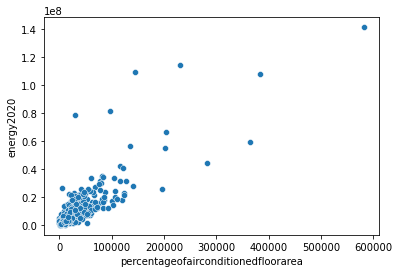

In [432]:
sn.scatterplot(x = data['percentageofairconditionedfloorarea'], y = data['energy2020'])

<AxesSubplot:ylabel='energy2020'>

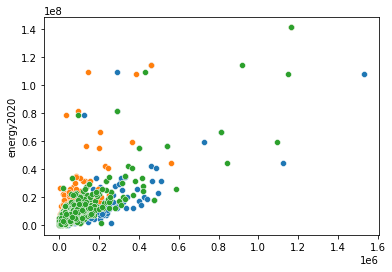

In [439]:
sn.scatterplot(x = data['int_conditioners'] + data['mainbuildingfunction'] + data['percentageofairconditionedfloorarea'], y = data['energy2020'])

sn.scatterplot(x = data['int_solarcond'] + data['typeofairconditioningsystem'] + data['percentageofairconditionedfloorarea'], y = data['energy2020'])

sn.scatterplot(x = data['int_buildcond'] + data['installationofsolarpv'] + data['percentageofairconditionedfloorarea'], y = data['energy2020'])

<AxesSubplot:ylabel='energy2020'>

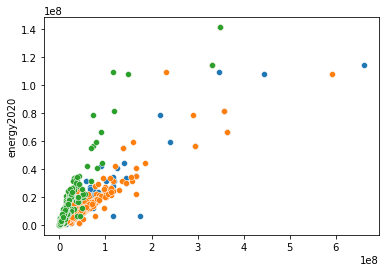

In [434]:
sn.scatterplot(x = data['int_benergy'] + data['mainbuildingfunction'] + data['average_energy'], y = data['energy2020'])

sn.scatterplot(x = data['int_con_energy'] + data['typeofairconditioningsystem'] + data['average_energy'], y = data['energy2020'])

sn.scatterplot(x = data['int_solar_energy'] + data['installationofsolarpv'] + data['average_energy'], y = data['energy2020'])


In [440]:
# Drop interacting variables: Conditioners are too spread out
data = data.drop(['int_conditioners', 
                  'int_solarcond', 
                  'int_buildcond'], axis = 1)

In [441]:
X = data.drop('energy2020', axis = 1)
# X['grossfloorarea'] = X['grossfloorarea'].str.replace(',', '').astype(float)

Y = data['energy2020']

# Training Set split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0, stratify = X['installationofsolarpv'])

X_test, X_validation, Y_test, Y_validation = train_test_split(X_test, Y_test, test_size = 0.5,random_state = 0, stratify = X_test['installationofsolarpv'])

mean_train = Y_train.mean()
mean_validation = Y_validation.mean()
mean_test = Y_test.mean()


In [461]:
from sklearn.linear_model import Ridge

regressor = Ridge(alpha = 55, fit_intercept = False, random_state = 0, positive = False)
regressor.fit(X_train, Y_train)

y_prediction = regressor.predict(X_test)
y_validation = regressor.predict(X_validation)
y_train = regressor.predict(X_train)

print('The Regression Coefficient is:', regressor.coef_)
print('The Intercept is:', regressor.intercept_)
print('The CV Root Mean Squared Error for the Test set is:', (mean_squared_error(Y_test, y_prediction)**0.5)/mean_test)
print('The R2 Score is:', r2_score(Y_test, y_prediction))
print('The CV Root Mean Squared Error for the Validation set is:', (mean_squared_error(y_validation, Y_validation)**0.5)/mean_validation)
print('The R2 Score is:', r2_score(Y_validation, y_validation))
print('The CV Root Mean Squared Error for the Training set is:', (mean_squared_error(Y_train, y_train)**0.5)/mean_train)


The Regression Coefficient is: [ 2.72914960e+05  3.51906480e+00 -6.68740306e+04  1.75988439e+05
  7.78894795e-01 -5.47686303e-02  4.55755560e-02  4.92822109e-02]
The Intercept is: 0.0
The CV Root Mean Squared Error for the Test set is: 0.1549576248253527
The R2 Score is: 0.9928246848187362
The CV Root Mean Squared Error for the Validation set is: 0.2886882701779325
The R2 Score is: 0.9599622609688913
The CV Root Mean Squared Error for the Training set is: 0.4072199918248019


/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=3.88757e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=2.83474e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=2.8872e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=2.93969e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=2.99219e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditi

<AxesSubplot:>

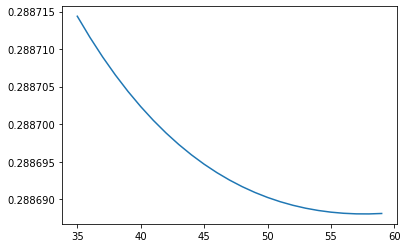

In [460]:
errors = []
alpha = [n for n in range(35, 60)]

for i in range(35, 60):
    regressor = Ridge(alpha = i, fit_intercept = False, random_state = 0, positive = False)
    regressor.fit(X_train, Y_train)

    y_prediction = regressor.predict(X_test)
    y_validation = regressor.predict(X_validation)
    y_train = regressor.predict(X_train)
    
    errors.append((mean_squared_error(y_validation, Y_validation)**0.5)/mean_validation)

sn.lineplot(x = alpha, y = errors)